# TODO
* See by day type, if it is a good categorization
* Try different day type categorization
* Regarder gares qui ont grosses anomalies en intensité et non en fréquence cf DataPreprocessing
* Code average model

# Highlights 
* Covid had big impact so we removed the covid time period.
*

Here are how many of each day type there are for the challenge provider :

job : 263
ferie : 12
vacances : 130
total = 405

Note that there also are many days corresponding to neither job nor ferie nor vacances.

In [2]:
from PandasToolsFunction import *
from tqdm import tqdm 

data_folder_path = '../data/'
# Charger les données d'entraînement
train_data = pd.read_csv(data_folder_path + 'train_data_woCov_with_day_of_week.csv')
#train_data = pd.read_csv('train_data_with_day_of_week.csv')
train_data['date'] = pd.to_datetime(train_data['date'])

In [3]:
def std_data(data: pd.DataFrame, day_type_col, display_mode:str = None):
    """
    Returns : A dict for which keys are types 
    and values are the standard deviations for that type and averaged over all stations.
    """
    
    STDs = {}
    day_types = data[day_type_col].unique()
    day_types.sort()

    for day_type in day_types : 
        relative_std = 0.
        station_count = len(data['station'].unique())
        
        for station in tqdm(data['station'].unique()):
                mask = (data['station'] == station) & (data[day_type_col] == day_type)
                y_values = data[mask]['y']
                mean, std = y_values.mean(), y_values.std() # if only one y_value std returns nan (which actually is considered as a np.float...)
                if len(y_values) < 2 or mean == 0 : 
                    station_count -= 1 # Because we drop a datapoint, we need to average on less stations.    
                else :
                    relative_std += std/mean # Compute relative standard deviation
        if display_mode is not None :
            if display_mode == 'day_of_week':
                key = day_of_week_map[day_type]
        else : 
             key = day_type
    
        STDs[key] = relative_std/station_count
    
    return STDs

def plot_std_data(data: pd.DataFrame, day_type_col, display_mode = None):
    
    if display_mode is not None : 
        if display_mode == 'day_of_week' :
            x_lab = 'days'
    else :
         x_lab = 'day types'
    
    y_lab ='std'

    STDs = std_data(data, day_type_col, display_mode)

    # Extracting keys and values from the dictionary
    keys = list(STDs.keys())
    values = list(STDs.values())

    # Creating a bar plot
    plt.plot(keys, values, color='blue')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f'Relative standard deviation per {x_lab}.')
    plt.show()

    return STDs

In [4]:
Day_of_week_STDs = plot_std_data(train_data, 'day_numeric', display_mode='days_of_week')

100%|██████████| 439/439 [00:13<00:00, 31.93it/s]


UnboundLocalError: cannot access local variable 'key' where it is not associated with a value

In [21]:
train_data_day_type = pd.read_csv(data_folder_path + 'train_data_day_type1.csv')
train_data_day_type['date'] = pd.to_datetime(train_data_day_type['date'])


In [32]:
for date in train_data_day_type['date'][880040:905000]:
    print(date)

2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00
2016-10-22 00:00:00


100%|██████████| 439/439 [00:33<00:00, 13.28it/s]


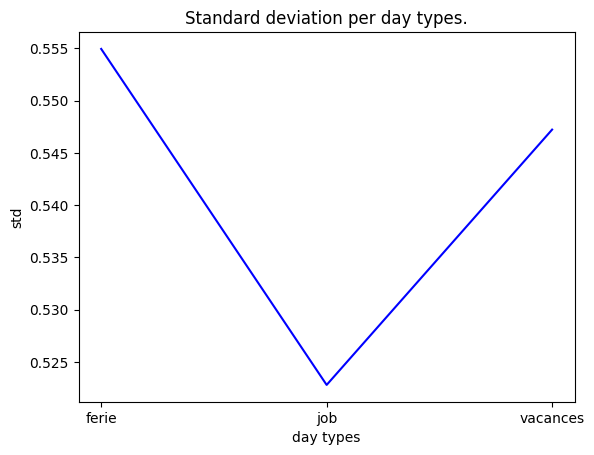

In [ ]:
day_type_STDs = plot_std_data(train_data_day_type, day_type_col='day_type')

In [ ]:

Rentree_2021 = '2021-09-02'

# Holydays

Rentree_2018 = ['2018-09-03', '2018-09-03']

Toussaint_2018 = ['2018-10-20', '2018-11-04']
Noel_2018 = ['2018-12-22', '2019-01-07']
Hiver_2019 = ['2019-02-23', '2019-03-10']  
Printemps_2019 = ['2019-04-20', '2019-05-05']  
Ascension_2019 = ['2019-05-30', '2019-05-31']
Ete_2019 = ['2019-07-05', '2019-09-02']

Toussaint_2019 = ['2019-10-19', '2019-11-04']
Noel_2019 = ['2019-12-21', '2020-01-06']
Hiver_2020 = ['2020-02-08', '2020-02-23']  # Zone C
Printemps_2020 = ['2020-04-04', '2020-04-19']  # Zone C
Ascension_2020 = ['2020-05-21', '2020-05-24']
Ete_2020 = ['2020-07-04', '2020-09-01']

Toussaint_2020 = ['2020-10-17', '2020-11-02']
Noel_2020 = ['2020-12-19', '2021-01-04']
Hiver_2021 = ['2021-02-13', '2021-03-01']
Printemps_2021 = ['2021-04-17', '2021-05-03']
Ascension_2021 = ['2021-05-12', '2021-05-17']
Ete_2021 = ['2021-07-06', '2021-09-02']

Toussaint_2021 = ['2021-10-23', '2021-11-08']
Noel_2021 = ['2021-12-18', '2022-01-03']
Hiver_2022 = ['2022-02-19', '2022-03-07']
Printemps_2022 = ['2022-04-23', '2022-05-09']
Ascension_2022 = ['2022-05-29', '2022-06-03']
Ete_2022 = ['2022-07-07', '2022-09-01']


Toussaint_2022 = ['2022-10-22', '2022-11-07']
Noel_2022 = ['2022-12-17', '2023-01-03']
Hiver_2023 = ['2023-02-18', '2023-03-06']
Printemps_2023 = ['2023-04-22', '2023-05-09']
Ascension_2023 = ['2023-05-17', '2023-05-22']
Ete_2023 = ['2023-07-08', '2023-09-04']

In [ ]:
mask = (train_data_day_type['station'] == '1J7') & (train_data_day_type['day_type'] == 'vacances')

train_data_one_station = train_data[mask]
filter_2015 = train_data_one_station['date'].dt.year == 2015
train_data_one_station_2015 = train_data_one_station[filter_2015]

for date in train_data_one_station_2015['date']:
    print(date)

In [34]:
mask = (train_data_day_type['station'] == '1J7') & (train_data_day_type['day_type'] == 'ferie')

train_data_one_station = train_data[mask]
filter_2015 = train_data_one_station['date'].dt.year == 2019
train_data_one_station_2015 = train_data_one_station[filter_2015]

for date in train_data_one_station_2015['date']:
    print(date)

2019-01-01 00:00:00
2019-06-01 00:00:00
2019-02-02 00:00:00
2019-05-10 00:00:00
2019-10-14 00:00:00
2019-11-14 00:00:00
2019-12-17 00:00:00
2019-03-18 00:00:00
2019-08-19 00:00:00
2019-09-21 00:00:00


/var/folders/g2/0mvnb_657cd3dc9mqcqbq_pr0000gn/T/ipykernel_1113/775049317.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data_one_station = train_data[mask]


In [13]:
print(len(train_data_one_station))

628


/Users/gurvanrichardeau/Python_projects/LocalCodes/challenge_sncf_2024/utils/PandasToolsFunction.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[day_name_col] = pd.Categorical(df[day_name_col], categories=custom_day_order, ordered=True)
100%|██████████| 10/10 [00:00<00:00, 994.76it/s]


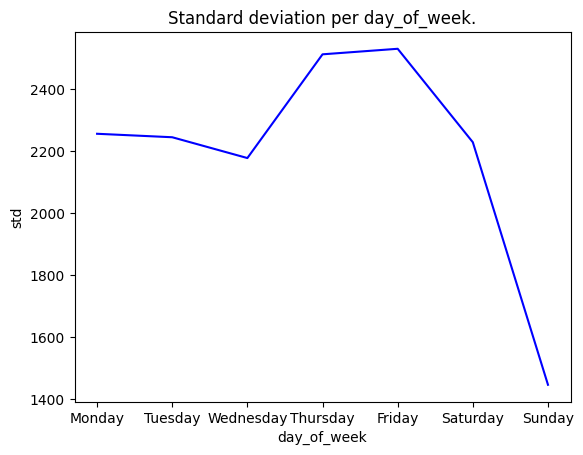

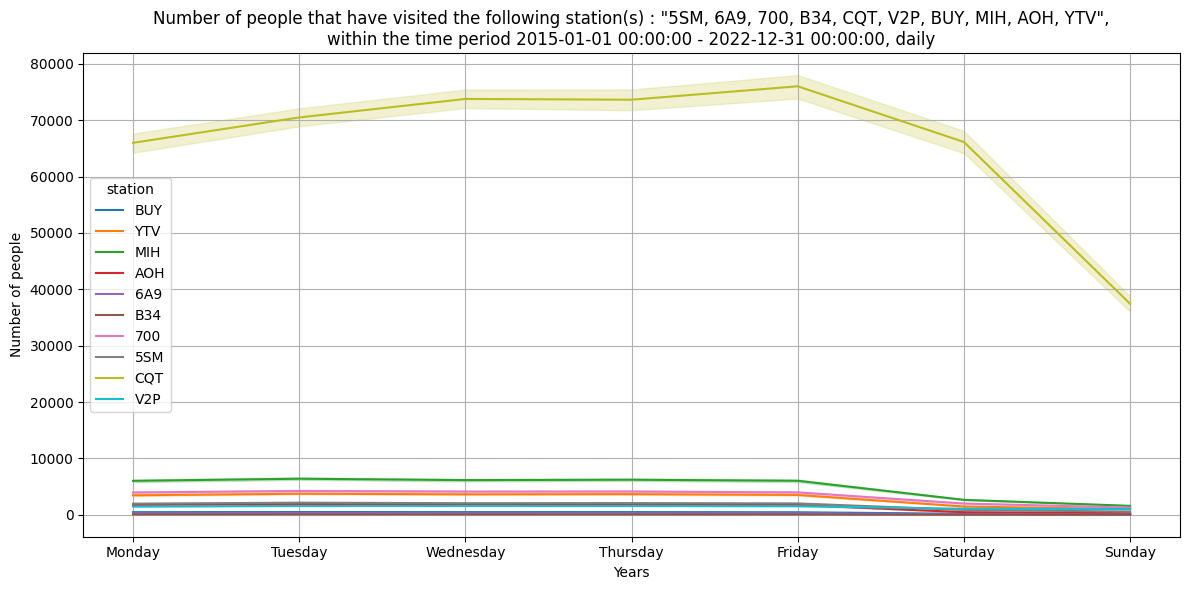

Count per day type for the following stations 5SM, 6A9, 700, B34, CQT, V2P, BUY, MIH, AOH, YTV
Time period : 2015-01-01 00:00:00 - 2022-12-31 00:00:00
job : 15530
ferie : 654
vacances : 7306
total = 23490


In [7]:
_, _ = display_by_station(train_data, 10, seed=1, display_mode='per_day_of_week') 
#_, _ = display_by_station(train_data, 1, seed=None, display_mode='dates') 